10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.00s. Est. time left: 00:00:00:00
30.0%. Run time:   0.00s. Est. time left: 00:00:00:00
40.0%. Run time:   0.01s. Est. time left: 00:00:00:00
50.0%. Run time:   0.01s. Est. time left: 00:00:00:00
60.0%. Run time:   0.01s. Est. time left: 00:00:00:00
70.0%. Run time:   0.01s. Est. time left: 00:00:00:00
80.0%. Run time:   0.01s. Est. time left: 00:00:00:00
90.0%. Run time:   0.01s. Est. time left: 00:00:00:00
100.0%. Run time:   0.02s. Est. time left: 00:00:00:00
Total run time:   0.02s


/home/topalidis/.pyenv/versions/3.11.12/lib/python3.11/site-packages/qutip/core/coefficient.py:420: UserWarning: `cython`, `setuptools` and `filelock` are required for compilation of string coefficents. Falling back on `eval`.
  warnings.warn(


(<Figure size 640x480 with 1 Axes>,
 array([<Axes: xlabel='time', ylabel='<Z>'>], dtype=object))

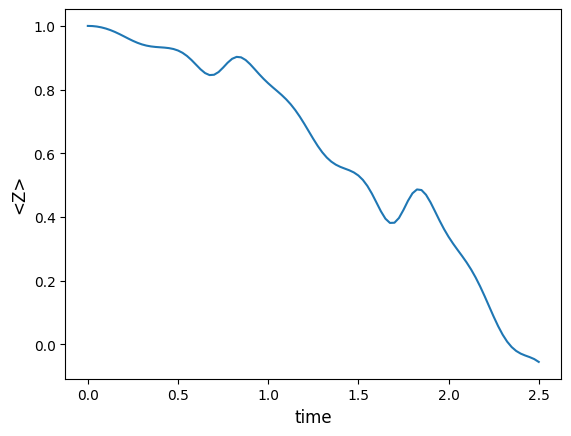

In [1]:
import numpy as np
from qutip import (about, basis, fmmesolve, fsesolve,
                   plot_expectation_values, sigmax, sigmaz)

def noise_spectrum(omega):
    return gamma * omega / (4 * np.pi)

gamma = 0.1
delta = 0.2 * 2 * np.pi
eps0 = 2 * np.pi
A = 2.5 * 2 * np.pi
omega = 2 * np.pi

H0 = -delta / 2.0 * sigmax() - eps0 / 2.0 * sigmaz()

H1 = [A / 2.0 * sigmaz(), "sin(w*t)"]
args = {"w": omega}

H = [H0, H1]

psi0 = basis(2, 0)

c_ops = [sigmax()]

T = 2 * np.pi / omega

tlist = np.linspace(0, 2.5 * T, 101)

fme_result = fmmesolve(
    H,
    psi0,
    tlist,
    c_ops=c_ops,
    spectra_cb=[noise_spectrum],
    e_ops=[sigmaz()],
    T=T,
    args=args
)

plot_expectation_values([fme_result],ylabels=["<Z>"])